In [322]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from statistics import mean

In [323]:
# Reading the CSV file
def read_csv(filename):
    Hours = []
    Marks = []
    file = open(filename, 'r')
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        Hours.append(int(row[0]))
        Marks.append(int(row[1]))
    file.close()
    # changinf to numpy vectors/ arrays
    Hours = np.array(Hours)
    Marks = np.array(Marks)
    
    return Hours, Marks

In [347]:
#visualising the data with Scatter Plot
def scatterplot(Hours, Marks):
    plt.scatter(Hours, Marks, edgecolors='r')
    plt.xlabel('Study of Hours')
    plt.ylabel('Marks Scored')
    plt.show()

In [348]:
# Checking if association exists
def find_corr_x_y(Hours,Marks):
    n = len(Hours)
    # Find the sum of the products
    product = []
    for xi,yi in zip(Hours,Marks):
        product.append(xi*yi)
    
    SumProductHoursMarks = sum(product)
    sumHours = sum(Hours)
    sumMarks = sum(Marks)
    squared_sum_Hours = sumHours**2
    squared_sum_Marks = sumMarks**2
    Hours_square = []
    
    for xi in Hours:
        Hours_square.append(xi**2)
    # Find the sum
    Hours_square_sum = sum(Hours_square)
    Marks_square=[]
    
    for yi in Marks:
        Marks_square.append(yi**2)
   
    # Find the sum
    Marks_square_sum = sum(Marks_square)
    
    # Use formula to calculate correlation
    numerator = n*SumProductHoursMarks - sumHours*sumMarks
    denominator_term1 = n*Hours_square_sum - squared_sum_Hours
    denominator_term2 = n*Marks_square_sum - squared_sum_Marks
    denominator = (denominator_term1*denominator_term2)**0.5
    correlation = numerator/denominator

    return correlation

In [349]:
# y = b0 + b1x1 
# Calculating Beta0 and Beta1
def B0_and_B1(Hours, Marks):
    df = pd.DataFrame(
    {'X': Hours,
     'y': Marks}
    )
    
    Hoursmean = np.mean(Hours)
    Marksmean = np.mean(Marks)

    # Calculate the terms needed for the numator and denominator of beta
    df['xycov'] = (df['X'] - Hoursmean) * (df['y'] - Marksmean)
    df['xvar'] = (df['X'] - Hoursmean)**2

    # Calculate beta and alpha
    B1 = df['xycov'].sum() / df['xvar'].sum()
    B0 = Marksmean - (B1 * Hoursmean)
    return B0, B1

In [350]:
# Fitting the Model
def model_fitting(B0, B1, Hours): 
    return (B0 + B1*Hours)

In [356]:
# Printing Regression Line / Fitted line
def Plot_fitted_line(Hours, Marks, Y):
    plt.scatter(Hours, Marks, color = 'red', label = "Data")
    plt.plot(Hours, Y, label="Fitted Line")
    plt.legend()
    plt.show()

In [357]:
# Calculating R_squared
def R_Squared(Marks, Y):
    meanMarks = mean(Marks)
    squaredMarks = sum((Marks - meanMarks)**2)
    squaredFitMarks = sum((Y - meanMarks)**2)
    return squaredFitMarks/squaredMarks

Visualising the data :


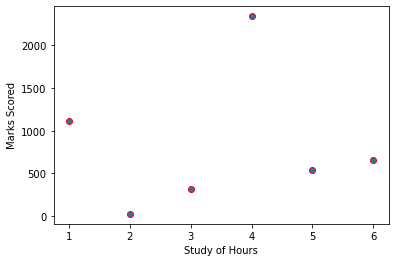

----------------------------------------------------

Correlation between Observations and Responses : 0.083213


----------------------------------------------------
Beta0 : 704.4
Beta1 : 36.6


----------------------------------------------------
Plot of fitted Line : 


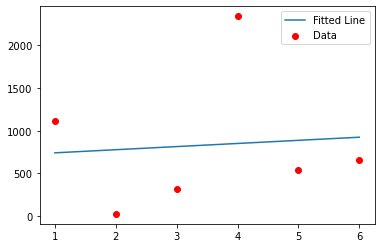

----------------------------------------------------

R-Squared is : 0.006924908527156511

----------------------------------------------------


In [358]:
# for reading the csv file
Hours, Marks = read_csv('c.csv')

# Visualising the data with scatter plot
print("Visualising the data :")
scatterplot(Hours, Marks)

#finding the correlation between observations and response variable
print("----------------------------------------------------")
corr = find_corr_x_y(Hours, Marks)
print(f"\nCorrelation between Observations and Responses : {corr:5f}\n\n")

# finding Beta0 and Beta1 from Observations
print("----------------------------------------------------")
B0, B1 = B0_and_B1(Hours, Marks)
print("Beta0 : {}\nBeta1 : {}\n\n".format(B0, B1))

# fitting the model and getting estimated values in Y variable
print("----------------------------------------------------")
Y = model_fitting(B0, B1, Hours)

# plotting fitted line
print("Plot of fitted Line : ")
Plot_fitted_line(Hours, Marks, Y)

# Calculating R-Square
print("----------------------------------------------------")
RSquared = R_Squared(Marks, Y)
print(f"\nR-Squared is : {RSquared}\n")
print("----------------------------------------------------")